# DEMO: Summarizing Categorical Columns

### 1. Import packages and Connect to the CAS Server

Visit the documentation for the SWAT [(SAS Scripting Wrapper for Analytics Transfer)](https://sassoftware.github.io/python-swat/index.html) package.

In [1]:
## Import packages
import swat
import pandas as pd
import matplotlib.pyplot as plt

## Set options
pd.set_option('max_columns', None)

## Connect to CAS
conn = swat.CAS('server.demo.sas.com', 30571, 'student', 'Metadata0', name='py03d03')

## Function to load the loans_raw table into memory if necessary
def loadloans():
    conn.loadTable(path='loans_raw.sashdat', caslib='casuser',
                   casOut={'name':'loans_raw',
                           'caslib':'casuser',
                           'promote':True})

### 2. Explore Available CAS Tables

a. Use the tableInfo action to view all available in-memory tables in the casuser caslib. If the **loans_raw** CAS table is not available, uncomment the statement and execute the loadloans function.

In [2]:
loadloans()
conn.tableInfo(caslib='casuser')

NOTE: Cloud Analytic Services made the file loans_raw.sashdat available as table LOANS_RAW in caslib CASUSER(student).


,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,2004 Car Data,428,15,0,utf-8,2021-11-08T15:47:14+00:00,2021-11-08T15:47:14+00:00,2021-11-08T15:47:14+00:00,UTF8,1.952006e+09,1.952006e+09,1.952006e+09,1,0,0,0,,,0,student,,,NaN
1,LOANS_RAW,,21758585,20,0,utf-8,2021-11-08T15:53:05+00:00,2021-11-08T15:53:08+00:00,2021-11-08T15:53:08+00:00,UTF8,1.952006e+09,1.952006e+09,1.952006e+09,1,0,0,0,loans_raw.sashdat,CASUSER(student),0,student,,2021-11-08T15:43:59+00:00,1.952005e+09


In [3]:
tbl = conn.CASTable('loans_raw', caslib='casuser', where = 'Amount < 0');
tbl.head()

,ID,AccNumber,Year,Month,Day,CurrentDate,SalaryGroup,Age,Salary,EmpLength,Category,Amount,InterestRate,LoanLength,LoanGrade,LoanStatus,LastPurchase,Cancelled,CancelledReason,Promotion
0,I-00004468360540922731,PKEO-2168-9268-6273-3208,2016.0,2.0,13.0,31DEC2022,"$100,001 - $250,000",59.0,240078.0,16.0,Credit Card,-1303.43,13.94,999999.0,A,Current,2022-12-26,0.0,,0.0
1,J-00008239738331176341,PKEO-8555-7589-6147-6820,2019.0,6.0,4.0,31DEC2022,"Less than $50,000",27.0,11763.0,13.0,Credit Card,-1496.21,10.51,999999.0,A,Fully Paid,2022-12-28,0.0,,0.0
2,B-00002644428326748312,PKEO-0741-1784-6772-0035,2014.0,10.0,16.0,31DEC2022,"Less than $50,000",42.0,16541.0,10.0,Credit Card,-1697.47,24.32,999999.0,E,Current,2022-12-29,0.0,,0.0
3,H-00002884491221047938,PKEO-5281-9146-0833-5760,2021.0,2.0,23.0,31DEC2022,"$100,001 - $250,000",41.0,234798.0,8.0,Credit Card,-1996.79,11.63,999999.0,A,Current,2022-12-30,0.0,,0.0
4,A-00009489751625806094,PKEO-5196-8577-3819-4822,2018.0,10.0,25.0,31DEC2022,"$50,001 - $100,000",26.0,77302.0,14.0,Credit Card,-1920.58,14.62,999999.0,A,Fully Paid,2020-10-14,0.0,,0.0


In [8]:
tbl.shape

(420, 20)

b. Reference a CAS table using the CASTable method and preview the table using the head method.

In [4]:
tbl = conn.CASTable('loans_raw', caslib='casuser')
tbl.head()

,ID,AccNumber,Year,Month,Day,CurrentDate,SalaryGroup,Age,Salary,EmpLength,Category,Amount,InterestRate,LoanLength,LoanGrade,LoanStatus,LastPurchase,Cancelled,CancelledReason,Promotion
0,E-00004875001308973879,PKEO-6984-3014-1068-4624,2022.0,9.0,1.0,31DEC2022,"$50,001 - $100,000",40.0,94215.0,4.0,Credit Card,0.00,15.73,999999.0,B,Fully Paid,2022-12-12,0.0,,0.0
1,E-00004875001308973879,MD0339180435985328-3358500,2019.0,6.0,5.0,31DEC2022,"$50,001 - $100,000",40.0,94215.0,4.0,Medical,52448.02,5.57,5.0,B,Current,NaT,0.0,,0.0
2,F-00002823160386178643,PKEO-8011-9314-5887-7115,2017.0,9.0,14.0,31DEC2022,"$50,001 - $100,000",23.0,52965.0,13.0,Credit Card,4063.02,14.56,999999.0,A,Current,2018-09-01,0.0,,0.0
3,F-00002823160386178643,CL16733520338311817560200002,2022.0,11.0,21.0,31DEC2022,"$50,001 - $100,000",23.0,52965.0,13.0,Consolidation,12183.14,4.33,7.0,A,Current,NaT,0.0,,0.0
4,H-00009196893067564816,CL8903393917717041-2781100,2022.0,2.0,19.0,31DEC2022,"$100,001 - $250,000",35.0,187997.0,2.0,Car Loan,32257.15,4.42,7.0,B,Current,NaT,0.0,,0.0


### 3. Frequency Distribution Using the value_counts Method

a. Use the value_counts method on the **Category** column to view frequency values of each category In the value_counts method use the normalize equals *True* option. The CAS server will summarize the data and return a Pandas series to the client.

In [7]:
vc_df = tbl.Category.value_counts(normalize=True)

## Display the object type and view the results
display(type(vc_df))
vc_df

pandas.core.series.Series

Credit Card         0.529342
Consolidation       0.085144
Mortgage            0.076234
Small Business      0.069851
Car Loan            0.069697
Home Improvement    0.059898
Education           0.039925
Medical             0.029931
Major Purchase      0.010010
Vacation            0.010006
Personal            0.009979
Moving Expenses     0.004991
Weddings            0.004991
dtype: float64

b. With a series object returned from CAS, you can use the Pandas plot method to visualize the summarized results.

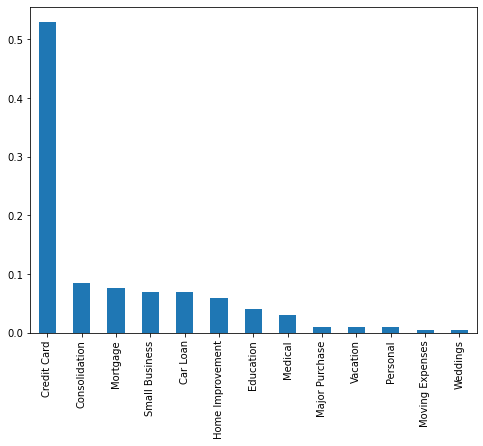

In [8]:
vc_df.plot(kind='bar', figsize=(8,6));

### 4. Frequency Distribution Using the freq Action

a. You can use the simple.freq action to obtain the frequency distribution of multiple columns. The freq action returns a CASResults object with a single SASDataFrame. Here the **Category** and **LoanGrade** columns are specified.

In [9]:
freq_results = tbl.freq(inputs=['Category','LoanGrade'])
freq_results

,Column,CharVar,FmtVar,Level,Frequency
0,Category,Car Loan,Car Loan,1,1263856.0
1,Category,Consolidation,Consolidation,2,1543958.0
2,Category,Credit Card,Credit Card,3,9598810.0
3,Category,Education,Education,4,723987.0
4,Category,Home Improvement,Home Improvement,5,1086164.0
5,Category,Major Purchase,Major Purchase,6,181521.0
6,Category,Medical,Medical,7,542749.0
7,Category,Mortgage,Mortgage,8,1382388.0
8,Category,Moving Expenses,Moving Expenses,9,90501.0
9,Category,Personal,Personal,10,180961.0


b. With a CASResult object on the client, you can reference the **Frequency** key to store the SASDataFrame in a variable named **freq_df**. Then confirm the type and value of the **freq_df** variable. Notice it's a SASDataFrame with the frequency values for the **Category** and **LoanGrade** columns.

In [10]:
freq_df = freq_results['Frequency']

display(type(freq_df))
freq_df

swat.dataframe.SASDataFrame

,Column,CharVar,FmtVar,Level,Frequency
0,Category,Car Loan,Car Loan,1,1263856.0
1,Category,Consolidation,Consolidation,2,1543958.0
2,Category,Credit Card,Credit Card,3,9598810.0
3,Category,Education,Education,4,723987.0
4,Category,Home Improvement,Home Improvement,5,1086164.0
5,Category,Major Purchase,Major Purchase,6,181521.0
6,Category,Medical,Medical,7,542749.0
7,Category,Mortgage,Mortgage,8,1382388.0
8,Category,Moving Expenses,Moving Expenses,9,90501.0
9,Category,Personal,Personal,10,180961.0


c. Once you have the SASDataFrame you can use the Pandas package to visualize the summarized results. Here, loop over each unique column in the SASDataFrame and plot a bar chart for each column.

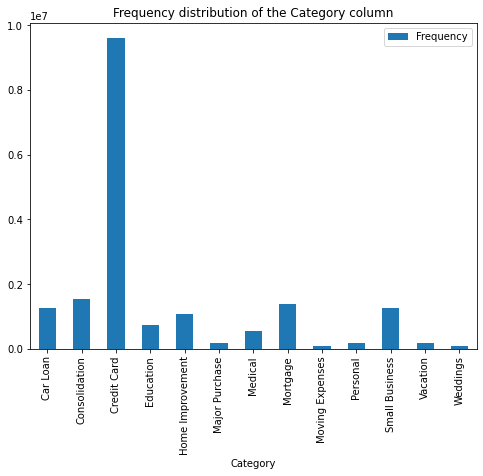

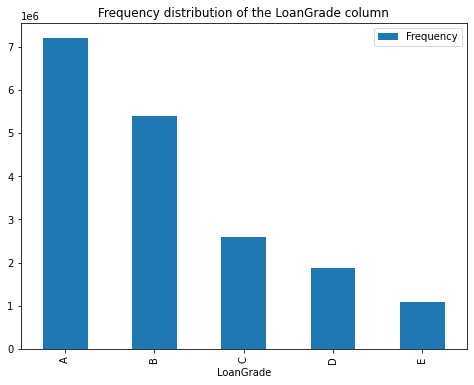

In [11]:
## Find the unique columns
cols = freq_df.Column.unique()

## Loop over the columns and plot the frequencies
for i in cols:
    freq_df.loc[freq_df['Column'] == i] \
           .plot(kind='bar', figsize=(8,6),
                 x='CharVar', y='Frequency',
                 xlabel=i, 
                 title=f'Frequency distribution of the {i} column')

d. You can also create a calculated column using the computedVarsProgram parameter, then execute an action. Here a new column is created named InterestCat. It uses the SAS IFC function to create the new column. If the current **InterestRate** is *0* then there was *No Interest*. Otherwise the value is *Interest*. Then use the **tbl** object with the freq action. Specify the inputs parameter with the new **InterestCat** column.

In [19]:
tbl.computedVarsProgram = "InterestCat = ifc(InterestRate = 0, 'No Interest', 'Interest');"
tbl.freq(inputs='InterestCat')

,Column,CharVar,FmtVar,Level,Frequency
0,InterestCat,Interest,Interest,1,17807327.0
1,InterestCat,No Interest,No Interest,2,326163.0


### 5. Frequency Distribution Using the freqTab Action

a. The [freqTab.freqTab](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/casactstat/cas-freqtab-TblOfActions.htm?homeOnFail) action provides much more functionality than the freq action. To use the freqTab action set you first need to load the freqTab action set using the [builtins.loadActionSet](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/caspg/cas-builtins-loadactionset.htm) action. Use the builtins.actionSetInfo action to view the available loaded action sets. Notice the freqTab action set is now available.

In [12]:
conn.loadactionset('freqtab')
conn.actionSetInfo()

NOTE: Added action set 'freqtab'.


,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,V.04.00M0P10072020,tkcas,false
1,accessControl,Access Controls,1,casmeta,V.04.00M0P10072020,tkcas,false
2,builtins,Builtins,1,tkcasablt,V.04.00M0P10072020,tkcas,false
3,configuration,Server Properties,1,tkcascfg,V.04.00M0P10072020,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,V.04.00M0P10072020,crsstat,false
5,dataStep,DATA Step,1,datastep,V.04.00M0P10072020,tkcas,false
6,freqTab,Frequency and Crosstabulation Analysis,1,xtab,V.04.00M0P10072020,crsfreq,false
7,percentile,Percentile,1,tkcasptl,V.04.00M0P10072020,crsstat,false
8,search,Search,1,casidx,V.04.00M0P10072020,crssearch,false
9,session,Session Methods,1,tkcsessn,V.04.00M0P10072020,tkcas,false


b. Use the [freqTab.freqTab](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/casactstat/cas-freqtab-freqtab.htm) action to perform a simple one way frequency table similar to the freq action. Begin by creating a frequency table of the **Category** column by using the tabulate parameter. Notice the results of the freqTab action returns a variety of information like the level information, number of observations, the one-way frequency table and timing.

In [20]:
ft_cr = tbl.freqTab(tabulate='Category')
ft_cr

[LevelInfo]

 Variable Level Information
 
    Variable  Levels                                             Values
 0  Category      13  Car Loan Consolidation Credit Card Education H...

[NObs]

 Number of Observations
 
       RowId                  Description       Value
 0     NREAD  Number of Observations Read  18133490.0
 1     NUSED  Number of Observations Used  18133490.0
 2  NWEIGHTS               Sum of Weights  18133490.0

[Table1.OneWayFreqs]

 Category
 
           F_Category          Category  Frequency    Percent  CumFrequency  CumPercent
 0           Car Loan          Car Loan  1263856.0   6.969734     1263856.0    6.969734
 1      Consolidation     Consolidation  1543958.0   8.514401     2807814.0   15.484135
 2        Credit Card       Credit Card  9598810.0  52.934157    12406624.0   68.418291
 3          Education         Education   723987.0   3.992541    13130611.0   72.410832
 4   Home Improvement  Home Improvement  1086164.0   5.989823    14216775.0   78.400655
 5     Major Purchase    Major Purchase   181521.0   1.001026    14398296.0   79.401682
 6            Medical           Medical   542749.0   2.993075    14941045.0   82.394757
 7           Mortgage          Mortgage  1382388.0   7.623397    16323433.0   90.018154
 8    Moving Expenses   Moving Expenses    90501.0   0.499082    16413934.0   90.517236
 9           Personal          Personal   180961.0   0.997938    16594895.0   91.515174
 10    Small Business    Small Business  1266649.0   6.985136    17861544.0   98.500311
 11          Vacation          Vacation   181445.0   1.000607    18042989.0   99.500918
 12          Weddings          Weddings    90501.0   0.499082    18133490.0  100.000000

[Timing]

 Task Timing
 
                        Task      Time   RelTime
 0         Setup and Parsing  0.007363  0.006467
 1              Levelization  0.643523  0.565174
 2  Producing Results Tables  0.487739  0.428357
 3                   Cleanup  0.000003  0.000003
 4                     Total  1.138628  1.000000

+ Elapsed: 1.66s, user: 17.8s, sys: 0.695s, mem: 3.46e+03mb

c. View the keys of the CASResults object. Notice four keys exist in the dictionary.

In [21]:
ft_cr.keys()

odict_keys(['LevelInfo', 'NObs', 'Table1.OneWayFreqs', 'Timing'])

d. To visualize the one-way frequency table as a SASDataFrame, call the **Table1.OneWayFreqs** key. Then use Pandas to sort and plot the SASDataFrame.

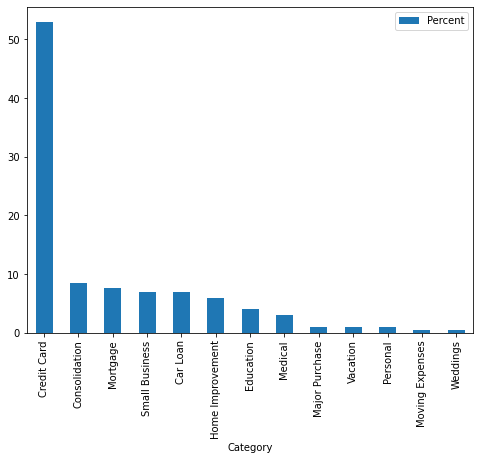

In [22]:
ft_cr['Table1.OneWayFreqs'].sort_values('Percent', ascending=False) \
                           .plot(kind='bar', x='Category', y='Percent', figsize=(8,6));

f. To create crosstabulation tables you specify a list with a dictionary within the tabulate parameter. Use the key vars, then a list of columns to use for the crosstabulation table.Here a crosstabulation will be performed between the **Category** and **LoanGrade** columns.

In [24]:
freqtab_cr = tbl.freqTab(tabulate=[
                           {'vars':['Category','LoanGrade']},
                         ])

freqtab_cr

[LevelInfo]

 Variable Level Information
 
     Variable  Levels                                             Values
 0   Category      13  Car Loan Consolidation Credit Card Education H...
 1  LoanGrade       5                                          A B C D E

[NObs]

 Number of Observations
 
       RowId                  Description       Value
 0     NREAD  Number of Observations Read  18133490.0
 1     NUSED  Number of Observations Used  18133490.0
 2  NWEIGHTS               Sum of Weights  18133490.0

[Table1.CrossList]

 Table of Category by LoanGrade
 
           F_Category          Category F_LoanGrade LoanGrade   Frequency     Percent  RowPercent  ColPercent
 0           Car Loan          Car Loan           A         A    501265.0    2.764305   39.661560    6.970096
 1           Car Loan          Car Loan           B         B    376142.0    2.074295   29.761460    6.967889
 2           Car Loan          Car Loan           C         C    181072.0    0.998550   14.326949    7.003579
 3           Car Loan          Car Loan           D         D    130517.0    0.719757   10.326889    6.944340
 4           Car Loan          Car Loan           E         E     74860.0    0.412827    5.923143    6.939674
 5           Car Loan          Car Loan       Total             1263856.0    6.969734  100.000000         NaN
 6      Consolidation     Consolidation           A         A    613360.0    3.382471   39.726469    8.528779
 7      Consolidation     Consolidation           B         B    460074.0    2.537151   29.798349    8.522698
 8      Consolidation     Consolidation           C         C    219024.0    1.207843   14.185878    8.471502
 9      Consolidation     Consolidation           D         D    159579.0    0.880024   10.335709    8.490625
 10     Consolidation     Consolidation           E         E     91921.0    0.506913    5.953595    8.521264
 11     Consolidation     Consolidation       Total             1543958.0    8.514401  100.000000         NaN
 12       Credit Card       Credit Card           A         A   3803217.0   20.973442   39.621755   52.883781
 13       Credit Card       Credit Card           B         B   2857774.0   15.759647   29.772170   52.939191
 14       Credit Card       Credit Card           C         C   1368873.0    7.548867   14.260862   52.945845
 15       Credit Card       Credit Card           D         D    996877.0    5.497436   10.385423   53.040241
 16       Credit Card       Credit Card           E         E    572069.0    3.154765    5.959791   53.031959
 17       Credit Card       Credit Card       Total             9598810.0   52.934157  100.000000         NaN
 18         Education         Education           A         A    287623.0    1.586143   39.727647    3.999402
 19         Education         Education           B         B    215377.0    1.187731   29.748739    3.989778
 20         Education         Education           C         C    103122.0    0.568683   14.243626    3.988596
 21         Education         Education           D         D     74790.0    0.412441   10.330296    3.979307
 22         Education         Education           E         E     43075.0    0.237544    5.949692    3.993140
 23         Education         Education       Total              723987.0    3.992541  100.000000         NaN
 24  Home Improvement  Home Improvement           A         A    430459.0    2.373834   39.631124    5.985538
 25  Home Improvement  Home Improvement           B         B    323958.0    1.786518   29.825883    6.001200
 26  Home Improvement  Home Improvement           C         C    155111.0    0.855384   14.280624    5.999448
 27  Home Improvement  Home Improvement           D         D    111947.0    0.617349   10.306639    5.956297
 28  Home Improvement  Home Improvement           E         E     64689.0    0.356738    5.955730    5.996802
 29  Home Improvement  Home Improvement       Total             1086164.0    5.989823  100.000000         NaN
 30    Major Purchase 

g. To view the first *30* rows of the crosstabulation, call the Table1.CrossList key and execute the head method.

In [20]:
freqtab_cr['Table1.CrossList'].head(30)

,F_Category,Category,F_LoanGrade,LoanGrade,Frequency,Percent,RowPercent,ColPercent
0,Car Loan,Car Loan,A,A,501265.0,2.764305,39.661560,6.970096
1,Car Loan,Car Loan,B,B,376142.0,2.074295,29.761460,6.967889
2,Car Loan,Car Loan,C,C,181072.0,0.998550,14.326949,7.003579
3,Car Loan,Car Loan,D,D,130517.0,0.719757,10.326889,6.944340
4,Car Loan,Car Loan,E,E,74860.0,0.412827,5.923143,6.939674
5,Car Loan,Car Loan,Total,,1263856.0,6.969734,100.000000,NaN
6,Consolidation,Consolidation,A,A,613360.0,3.382471,39.726469,8.528779
7,Consolidation,Consolidation,B,B,460074.0,2.537151,29.798349,8.522698
8,Consolidation,Consolidation,C,C,219024.0,1.207843,14.185878,8.471502
9,Consolidation,Consolidation,D,D,159579.0,0.880024,10.335709,8.490625


g. The freqTab action allows you to create many frequency and crosstabulation tables as you would like within a single action by specifying a list. Here the freqTab action will create a one way frequency table for **Category** and **LoanGrade**, and a crosstabulation of **Category** and **LoanGrade**.

In [21]:
tbl.freqTab(tabulate=[
                'Category',
                'LoanGrade',
                {'vars':['Category','LoanGrade']},
            ]
)

[LevelInfo]

 Variable Level Information
 
     Variable  Levels                                             Values
 0   Category      13  Car Loan Consolidation Credit Card Education H...
 1  LoanGrade       5                                          A B C D E

[NObs]

 Number of Observations
 
       RowId                  Description       Value
 0     NREAD  Number of Observations Read  18133490.0
 1     NUSED  Number of Observations Used  18133490.0
 2  NWEIGHTS               Sum of Weights  18133490.0

[Table1.OneWayFreqs]

 Category
 
           F_Category          Category  Frequency    Percent  CumFrequency  CumPercent
 0           Car Loan          Car Loan  1263856.0   6.969734     1263856.0    6.969734
 1      Consolidation     Consolidation  1543958.0   8.514401     2807814.0   15.484135
 2        Credit Card       Credit Card  9598810.0  52.934157    12406624.0   68.418291
 3          Education         Education   723987.0   3.992541    13130611.0   72.410832
 4   Home Improvement  Home Improvement  1086164.0   5.989823    14216775.0   78.400655
 5     Major Purchase    Major Purchase   181521.0   1.001026    14398296.0   79.401682
 6            Medical           Medical   542749.0   2.993075    14941045.0   82.394757
 7           Mortgage          Mortgage  1382388.0   7.623397    16323433.0   90.018154
 8    Moving Expenses   Moving Expenses    90501.0   0.499082    16413934.0   90.517236
 9           Personal          Personal   180961.0   0.997938    16594895.0   91.515174
 10    Small Business    Small Business  1266649.0   6.985136    17861544.0   98.500311
 11          Vacation          Vacation   181445.0   1.000607    18042989.0   99.500918
 12          Weddings          Weddings    90501.0   0.499082    18133490.0  100.000000

[Table2.OneWayFreqs]

 LoanGrade
 
   F_LoanGrade LoanGrade  Frequency    Percent  CumFrequency  CumPercent
 0           A         A  7191651.0  39.659497     7191651.0   39.659497
 1           B         B  5398220.0  29.769338    12589871.0   69.428836
 2           C         C  2585421.0  14.257713    15175292.0   83.686549
 3           D         D  1879473.0  10.364651    17054765.0   94.051200
 4           E         E  1078725.0   5.948800    18133490.0  100.000000

[Table3.CrossList]

 Table of Category by LoanGrade
 
           F_Category          Category F_LoanGrade LoanGrade   Frequency     Percent  RowPercent  ColPercent
 0           Car Loan          Car Loan           A         A    501265.0    2.764305   39.661560    6.970096
 1           Car Loan          Car Loan           B         B    376142.0    2.074295   29.761460    6.967889
 2           Car Loan          Car Loan           C         C    181072.0    0.998550   14.326949    7.003579
 3           Car Loan          Car Loan           D         D    130517.0    0.719757   10.326889    6.944340
 4           Car Loan          Car Loan           E         E     74860.0    0.412827    5.923143    6.939674
 5           Car Loan          Car Loan       Total             1263856.0    6.969734  100.000000         NaN
 6      Consolidation     Consolidation           A         A    613360.0    3.382471   39.726469    8.528779
 7      Consolidation     Consolidation           B         B    460074.0    2.537151   29.798349    8.522698
 8      Consolidation     Consolidation           C         C    219024.0    1.207843   14.185878    8.471502
 9      Consolidation     Consolidation           D         D    159579.0    0.880024   10.335709    8.490625
 10     Consolidation     Consolidation           E         E     91921.0    0.506913    5.953595    8.521264
 11     Consolidation     Consolidation       Total             1543958.0    8.514401  100.000000         NaN
 12       Credit Card       Credit Card           A         A   3803217.0   20.973442   39.621755   52.883781
 13       Credit Card       Credit Card           B         B   2857774.0   15.759647   29.772170   52.939191
 14       Credit Card       Credit Card  

### 6. Creating Crosstabs Using the crossTab Action

a. The [simple.crossTab](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/casanpg/cas-simple-crosstab.htm) performs a one-way or two-way tabulation. Here the crossTab action will create a two-way tabulation between **Category** and **LoanGrade**. Use the row parameter to specify the row, and the col paramter to specify the column. Store the SASDataFrame from the result of the crossTab action and view the results. Notice the results of the crossTab action do not name the columns by default.

In [5]:
cross_df = tbl.crosstab(row='Category', col='LoanGrade')['Crosstab']
cross_df

,Category,Col1,Col2,Col3,Col4,Col5
0,Car Loan,501265.0,376142.0,181072.0,130517.0,74860.0
1,Consolidation,613360.0,460074.0,219024.0,159579.0,91921.0
2,Credit Card,3803217.0,2857774.0,1368873.0,996877.0,572069.0
3,Education,287623.0,215377.0,103122.0,74790.0,43075.0
4,Home Improvement,430459.0,323958.0,155111.0,111947.0,64689.0
5,Major Purchase,71858.0,54085.0,25825.0,18950.0,10803.0
6,Medical,215462.0,161856.0,77364.0,56083.0,31984.0
7,Mortgage,549258.0,411711.0,196821.0,142704.0,81894.0
8,Moving Expenses,35821.0,26912.0,13077.0,9377.0,5314.0
9,Personal,71417.0,53889.0,25991.0,18882.0,10782.0


b. To name the columns in the SASDataFrame you can use some of the additional information stored in SASDataFrame. Use the colinfo attribute to view metadata about the SASDataFrame. Notice the colinfo attribute returns a dictionary that contains each column name, it's type, label and more. The label key indictes the **LoanGrade** for each column.

In [7]:
cross_df.colinfo

{'Category': SASColumnSpec(attrs=dict(Template='Row'), dtype='varchar', name='Category', size=(1, 1), width=16),
 'Col1': SASColumnSpec(attrs=dict(Template='Col'), dtype='double', label='A', name='Col1', size=(1, 1), width=8),
 'Col2': SASColumnSpec(attrs=dict(Template='Col'), dtype='double', label='B', name='Col2', size=(1, 1), width=8),
 'Col3': SASColumnSpec(attrs=dict(Template='Col'), dtype='double', label='C', name='Col3', size=(1, 1), width=8),
 'Col4': SASColumnSpec(attrs=dict(Template='Col'), dtype='double', label='D', name='Col4', size=(1, 1), width=8),
 'Col5': SASColumnSpec(attrs=dict(Template='Col'), dtype='double', label='E', name='Col5', size=(1, 1), width=8)}

c. Use apply_labels with the inplace equals True parameter to apply labels and the column names. Execute the cell and notice the column names have changed.

In [11]:
cross_df.apply_labels(inplace=True)
cross_df

,Category,A,B,C,D,E
0,Car Loan,501265.0,376142.0,181072.0,130517.0,74860.0
1,Consolidation,613360.0,460074.0,219024.0,159579.0,91921.0
2,Credit Card,3803217.0,2857774.0,1368873.0,996877.0,572069.0
3,Education,287623.0,215377.0,103122.0,74790.0,43075.0
4,Home Improvement,430459.0,323958.0,155111.0,111947.0,64689.0
5,Major Purchase,71858.0,54085.0,25825.0,18950.0,10803.0
6,Medical,215462.0,161856.0,77364.0,56083.0,31984.0
7,Mortgage,549258.0,411711.0,196821.0,142704.0,81894.0
8,Moving Expenses,35821.0,26912.0,13077.0,9377.0,5314.0
9,Personal,71417.0,53889.0,25991.0,18882.0,10782.0


d. xxx

In [24]:
cross_df = tbl.crosstab(row='Category', col='LoanGrade', 
                        aggregator='MEAN', weight='InterestRate')['Crosstab']


cross_df.apply_labels(inplace = True)
cross_df.style.set_caption('The MEAN Interest Rate by Category and Loan Grade', )

,Category,A,B,C,D,E
0,Car Loan,3.422453,4.399285,5.374372,6.095755,6.287667
1,Consolidation,4.888226,6.283057,7.683477,8.189633,8.380194
2,Credit Card,12.381018,15.918914,19.459833,18.897138,19.086125
3,Education,4.562917,5.867199,7.170334,7.729530,7.918175
4,Home Improvement,6.841400,8.786564,10.746544,10.600928,10.747008
5,Major Purchase,9.771935,12.578259,15.378179,15.215536,15.359828
6,Medical,5.215225,6.701908,8.191985,8.649959,8.830447
7,Mortgage,2.932580,3.769674,4.609960,5.402874,5.587931
8,Moving Expenses,9.787412,12.540795,15.358699,15.179088,15.357354
9,Personal,9.775660,12.579594,15.329563,15.166362,15.337214


### 6. Terminate the CAS Session

a. It's best practice to always terminate the CAS session when you are done.

In [11]:
conn.terminate()